In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, Dense, Lambda
from sklearn.decomposition import PCA
import re

In [33]:
file = open("./CBOW/CBOW.txt","r")
data = file.read()

In [34]:
print(data)

The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. 

Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission â€“transmission of the virus before the appearance of symptoms â€“ is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. 

The reproductive number â€“ the number of secondary infections generated from one infected individual â€“ is understood to be be

In [35]:
sentences = data.split(".")
print(sentences)

['The speed of transmission is an important point of difference between the two viruses', ' Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus', ' The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days', ' This means that influenza can spread faster than COVID-19', ' \n\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission â€“transmission of the virus before the appearance of symptoms â€“ is a major driver of transmission for influenza', ' In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission', ' \n\nThe reproductive number â€“ the number of secondary infections generated from one infected individual â€

In [36]:
cleaned_sentences = []
for sentence in sentences:
    if sentence == "":
        continue
    sentence = re.sub("[^A-Za-z0-9]+"," ",sentence)
    sentence = sentence.lower()
    cleaned_sentences.append(sentence)

In [37]:
print(cleaned_sentences)

['the speed of transmission is an important point of difference between the two viruses', ' influenza has a shorter median incubation period the time from infection to appearance of symptoms and a shorter serial interval the time between successive cases than covid 19 virus', ' the serial interval for covid 19 virus is estimated to be 5 6 days while for influenza virus the serial interval is 3 days', ' this means that influenza can spread faster than covid 19', ' further transmission in the first 3 5 days of illness or potentially pre symptomatic transmission transmission of the virus before the appearance of symptoms is a major driver of transmission for influenza', ' in contrast while we are learning that there are people who can shed covid 19 virus 24 48 hours prior to symptom onset at present this does not appear to be a major driver of transmission', ' the reproductive number the number of secondary infections generated from one infected individual is understood to be between 2 an

In [38]:
corpus = cleaned_sentences

In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print(sequences)

[[1, 37, 2, 3, 9, 38, 39, 40, 2, 41, 13, 1, 42, 22], [4, 43, 11, 23, 44, 45, 46, 1, 14, 24, 47, 10, 25, 2, 26, 12, 11, 23, 15, 16, 1, 14, 13, 48, 49, 17, 5, 6, 7], [1, 15, 16, 8, 5, 6, 7, 9, 50, 10, 18, 19, 51, 20, 27, 8, 4, 7, 1, 15, 16, 9, 28, 20], [29, 52, 30, 4, 31, 53, 54, 17, 5, 6], [55, 3, 32, 1, 56, 28, 19, 20, 2, 57, 58, 59, 60, 61, 3, 3, 2, 1, 7, 62, 1, 25, 2, 26, 9, 11, 33, 34, 2, 3, 8, 4], [32, 63, 27, 64, 21, 65, 30, 66, 21, 67, 68, 31, 69, 5, 6, 7, 70, 71, 72, 73, 10, 74, 75, 76, 77, 29, 78, 79, 80, 10, 18, 11, 33, 34, 2, 3], [1, 81, 35, 1, 35, 2, 82, 83, 84, 24, 85, 86, 87, 9, 88, 10, 18, 13, 36, 12, 36], [19, 8, 5, 6, 7, 89, 17, 8, 4], [90, 91, 8, 92, 5, 6, 12, 4, 22, 21, 93, 94, 12, 14, 95, 96, 97, 98, 99, 100], []]


In [62]:
index_to_word_map ={}
word_to_index_map = {}

for ind1, sequence in enumerate(sequences):
    print(sequence)
    words = cleaned_sentences[ind1].split()
    print(words)
    for ind2, value in enumerate(sequence):
        index_to_word_map[value] = words[ind2]
        word_to_index_map[words[ind2]] = value

[1, 37, 2, 3, 9, 38, 39, 40, 2, 41, 13, 1, 42, 22]
['the', 'speed', 'of', 'transmission', 'is', 'an', 'important', 'point', 'of', 'difference', 'between', 'the', 'two', 'viruses']
[4, 43, 11, 23, 44, 45, 46, 1, 14, 24, 47, 10, 25, 2, 26, 12, 11, 23, 15, 16, 1, 14, 13, 48, 49, 17, 5, 6, 7]
['influenza', 'has', 'a', 'shorter', 'median', 'incubation', 'period', 'the', 'time', 'from', 'infection', 'to', 'appearance', 'of', 'symptoms', 'and', 'a', 'shorter', 'serial', 'interval', 'the', 'time', 'between', 'successive', 'cases', 'than', 'covid', '19', 'virus']
[1, 15, 16, 8, 5, 6, 7, 9, 50, 10, 18, 19, 51, 20, 27, 8, 4, 7, 1, 15, 16, 9, 28, 20]
['the', 'serial', 'interval', 'for', 'covid', '19', 'virus', 'is', 'estimated', 'to', 'be', '5', '6', 'days', 'while', 'for', 'influenza', 'virus', 'the', 'serial', 'interval', 'is', '3', 'days']
[29, 52, 30, 4, 31, 53, 54, 17, 5, 6]
['this', 'means', 'that', 'influenza', 'can', 'spread', 'faster', 'than', 'covid', '19']
[55, 3, 32, 1, 56, 28, 19, 20,

In [64]:
print(index_to_word_map)
print()
print(word_to_index_map)

{1: 'the', 37: 'speed', 2: 'of', 3: 'transmission', 9: 'is', 38: 'an', 39: 'important', 40: 'point', 41: 'difference', 13: 'between', 42: 'two', 22: 'viruses', 4: 'influenza', 43: 'has', 11: 'a', 23: 'shorter', 44: 'median', 45: 'incubation', 46: 'period', 14: 'time', 24: 'from', 47: 'infection', 10: 'to', 25: 'appearance', 26: 'symptoms', 12: 'and', 15: 'serial', 16: 'interval', 48: 'successive', 49: 'cases', 17: 'than', 5: 'covid', 6: '19', 7: 'virus', 8: 'for', 50: 'estimated', 18: 'be', 19: '5', 51: '6', 20: 'days', 27: 'while', 28: '3', 29: 'this', 52: 'means', 30: 'that', 31: 'can', 53: 'spread', 54: 'faster', 55: 'further', 32: 'in', 56: 'first', 57: 'illness', 58: 'or', 59: 'potentially', 60: 'pre', 61: 'symptomatic', 62: 'before', 33: 'major', 34: 'driver', 63: 'contrast', 64: 'we', 21: 'are', 65: 'learning', 66: 'there', 67: 'people', 68: 'who', 69: 'shed', 70: '24', 71: '48', 72: 'hours', 73: 'prior', 74: 'symptom', 75: 'onset', 76: 'at', 77: 'present', 78: 'does', 79: 'not'

In [50]:
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(window_size, len(sequence)-window_size):
        context = sequence[i-window_size:i] + sequence[i+1:i+window_size+1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

In [51]:
print(contexts[0])
print(targets[0])

[1, 37, 3, 9]
2


In [52]:
X = np.array(contexts)
y = np.array(targets)

In [53]:
model = keras.Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2*window_size))
model.add(Lambda(lambda x : tf.reduce_mean(x,axis=1)))
model.add(Dense(256, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(units=vocab_size, activation="softmax"))

model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X,y,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 4.6150 - accuracy: 0.0189
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 4.6027 - accuracy: 0.0755
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 4.5865 - accuracy: 0.0566
Epoch 4/100
5/5 [==============================] - 0s 0s/step - loss: 4.5546 - accuracy: 0.0692 
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 4.5046 - accuracy: 0.0692
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 4.4248 - accuracy: 0.0503
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 4.3114 - accuracy: 0.0503
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 4.2444 - accuracy: 0.0503
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 4.2113 - accuracy: 0.0692
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 4.1745 - accuracy: 0.0692
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 704us/step - loss: 0.0508 - accuracy: 1.0000
Epoch 85/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0477 - accuracy: 1.0000
Epoch 86/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 1.0000
Epoch 87/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 1.0000
Epoch 92/100
5/5 [==============================] - 0s 0s/step - loss: 0.0359 - accuracy: 1.0000
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 1.0000
Epoch 94/100
5/5 [==============

In [56]:
embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

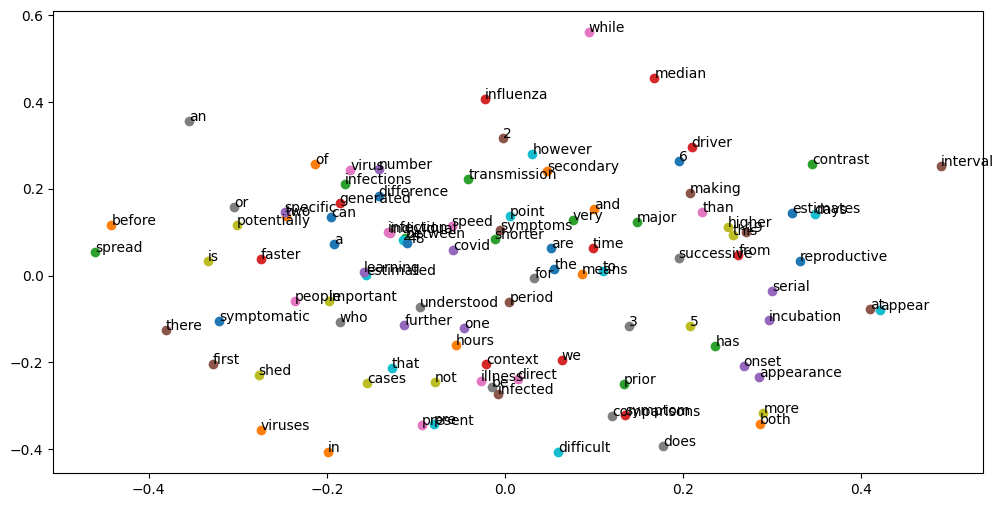

In [59]:
plt.figure(figsize=(12,6))
for ind, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[ind]
    plt.scatter(x,y)
    plt.annotate(word,xy=(x,y))

In [71]:
test_sentences = ["shorter median period the"]

for sentence in test_sentences:
    test_words = sentence.split()
    print("Words: ",test_words)
    x_test = []
    for i in test_words:
        x_test.append(word_to_index_map.get(i))
    x_test = np.array([x_test])
    print("Index: ",x_test)
    y_pred = model.predict(x_test)
    print("Predictions: ",test_words,"->",index_to_word_map.get(np.argmax(y_pred[0])))

Words:  ['shorter', 'median', 'period', 'the']
Index:  [[23 44 46  1]]
1/1 [==============================] - 0s 22ms/step
Predictions:  ['shorter', 'median', 'period', 'the'] -> incubation
